<a href="https://colab.research.google.com/github/erbisti/Collab/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dispositivo disponível: /device:GPU:0

Treinando com batch_size = 32
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8952 - loss: 0.3413 - val_accuracy: 0.9858 - val_loss: 0.0506
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9824 - loss: 0.0546 - val_accuracy: 0.9863 - val_loss: 0.0429
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9887 - loss: 0.0360 - val_accuracy: 0.9902 - val_loss: 0.0357
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9888 - val_loss: 0.0378
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9939 - loss: 0.0189 - val_accuracy: 0.9920 - val_loss: 0.0294
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0124 - val_accuracy: 0.9913 - val_loss: 0.0347
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0113 - val_accuracy: 0.9922 - val_loss: 0.0329
Epoch 8/10
1688/168

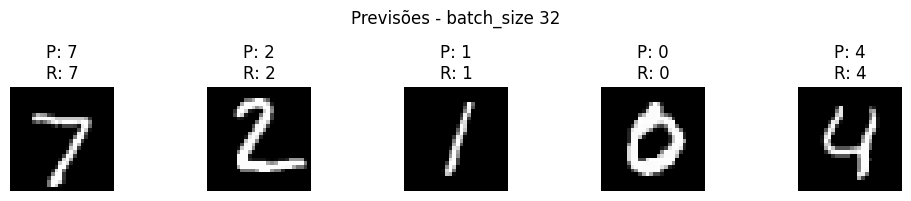

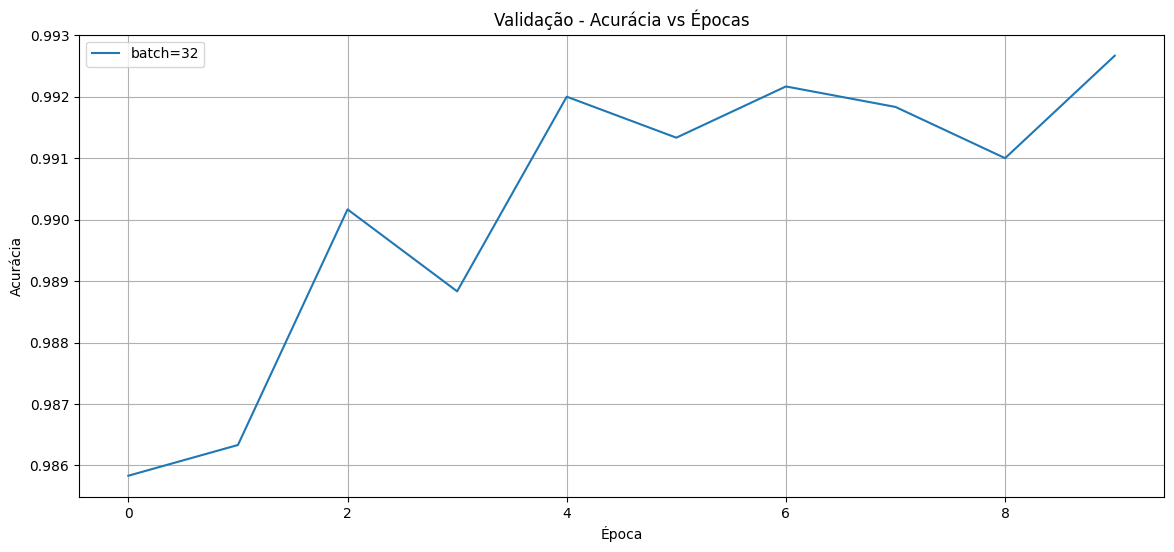

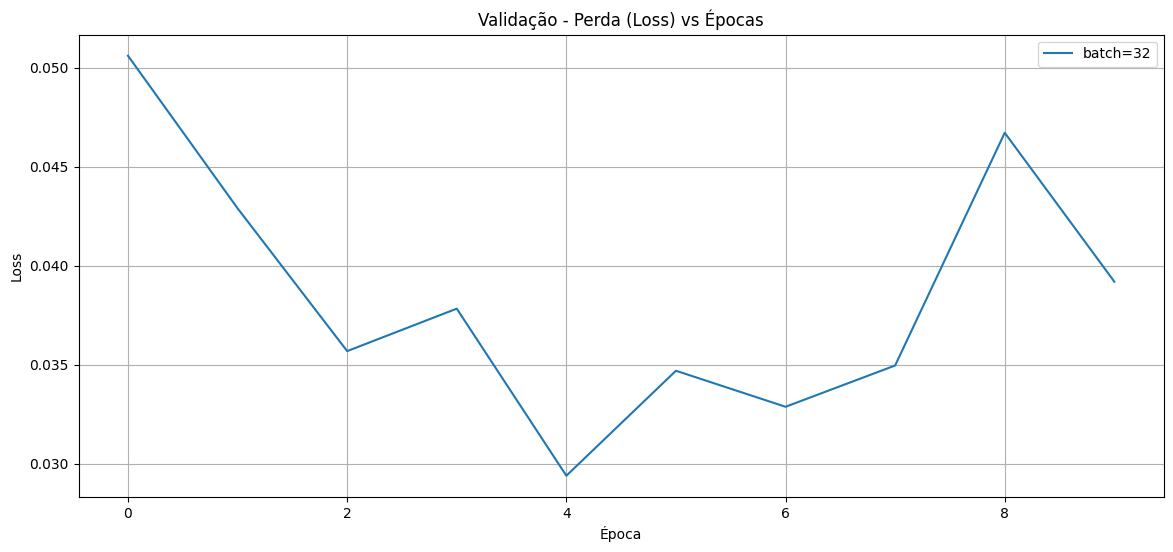

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Verificação de GPU
device_name = tf.test.gpu_device_name()
print(f"Dispositivo disponível: {device_name if device_name else 'CPU'}")

# Carregar o dataset MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalizar e redimensionar para (28, 28, 1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)  # shape: (60000, 28, 28, 1)
X_test = np.expand_dims(X_test, -1)

# CNN simples
def build_cnn_model():
    model = keras.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

batch_sizes = [32]
histories = {}

for bs in batch_sizes:
    print(f"\nTreinando com batch_size = {bs}")
    model = build_cnn_model()
    history = model.fit(
        X_train, y_train,
        epochs=8,
        batch_size=bs,
        validation_split=0.1,
        verbose=1
    )
    histories[bs] = history

    # Avaliação final
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Acurácia final no teste (batch={bs}): {test_acc:.4f}")

    # Previsões visuais
    predictions = model.predict(X_test[:5])
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"P: {np.argmax(predictions[i])}\nR: {y_test[i]}")
        plt.axis('off')
    plt.suptitle(f"Previsões - batch_size {bs}")
    plt.tight_layout()
    plt.show()

# Plot acurácia por época
plt.figure(figsize=(14, 6))
for bs in batch_sizes:
    plt.plot(histories[bs].history['val_accuracy'], label=f'batch={bs}')
plt.title("Validação - Acurácia vs Épocas")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

# Plot perda por época
plt.figure(figsize=(14, 6))
for bs in batch_sizes:
    plt.plot(histories[bs].history['val_loss'], label=f'batch={bs}')
plt.title("Validação - Perda (Loss) vs Épocas")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
